In [34]:
import os
import numpy as np

In [2]:
with open('amur/plain_reid_train/train/class_mapping.txt') as f:
    mapping = {'{}.jpg'.format(x.strip().split('\t')[0]) : x.strip().split('\t')[1] for x in f.readlines()}

In [4]:
with open('amur/plain_reid_train/train/normalized_class_mapping.txt', 'w') as f:
    for k,v in mapping.items():
        f.write('{}\t{}\n'.format(k,v))

In [5]:
with open('ELPephants/class_mapping.txt') as f:
    mapping = {x.strip().split('\t')[0]: x.strip().split('\t')[1] for x in f.readlines()}

In [12]:
imgnames = [x for x in os.listdir('ELPephants/images/') if x.endswith('.jpg')]
with open('ELPephants/normalized_class_mapping.txt', 'w') as f:
    for im in imgnames:
        f.write('{}\t{}\n'.format(im, mapping[im.split('_')[0]]))

In [13]:
with open('jaguars/reid/class_mapping.txt') as f:
    mapping = {x.strip().split('\t')[0]: x.strip().split('\t')[1] for x in f.readlines()}

In [14]:
unids = set([v for _,v in mapping.items()])

In [16]:
split_per = .75

In [22]:
list_map = {}
for k,v in mapping.items():
    if not v in list_map:
        list_map[v] = []
    list_map[v].append(k)

In [29]:
min_listmap = {k:v for k,v in list_map.items() if len(v) >= 3}

In [44]:
np.average([len(v) for _,v in min_listmap.items()])

23.391304347826086

In [46]:
import matplotlib.pyplot as plt

<BarContainer object of 46 artists>

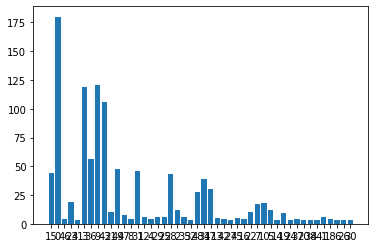

In [57]:
plt.bar(x = min_listmap.keys(), height=[len(v) for _,v in min_listmap.items()])

In [64]:
np.random.choice(min_listmap['23'], max(1, int(np.ceil(.15 * len(min_listmap['23'])))))

array(['j59_10_0.jpg', 'j59_4_0.jpg', 'j59_4_0.jpg'], dtype='<U12')

In [113]:
def shuffle(x,y):
    c = list(zip(x,y))
    np.random.shuffle(c)
    return zip(*c)

def train_val_split_closedset(x, y, percent=.25, min_entries=3, seed=12924):
    '''
        xy_map - the class_mapping file, each entry split and entered into a dict
        percent - percentage of each id to split
        min_entries - filter out any ids which have less than this number of images
    '''
    # For Id:Images map
    assert len(x) == len(y)
    assert len(x) > 0
    id_map = {}
    for i in range(len(x)):
        if not y[i] in id_map:
            id_map[y[i]] = []
        id_map[y[i]].append(x[i])
    
    # Filter out ids that don't have min number of images
    id_map = {k:v for k,v in id_map.items() if len(v) >= min_entries}
    
    # For each id, split percent of entries randomly and separate them
    train_x = []
    test_x = []
    train_y = []
    test_y = []
    
    np.random.seed(seed)
    for i in id_map.keys():
        n = max( 1, int( np.ceil(percent * len(id_map[i])) ) )
        
        l = len(id_map[i])
        pick = np.random.choice(range(l), n) # pick n elements at random
        te_x = [id_map[i][x] for x in pick]
        tr_x = [id_map[i][x] for x in range(l) if x not in pick] # Remaining goes to training set
        te_y = [i for _ in range(len(te_x))] # All Test ids = i
        tr_y = [i for _ in range(len(tr_x))] # All Train ids = i
        
        train_x.extend(tr_x)
        test_x.extend(te_x)
        train_y.extend(tr_y)
        test_y.extend(te_y)
    
    train_x,train_y = shuffle(train_x,train_y)
    test_x,test_y = shuffle(test_x,test_y)
    
    return train_x,train_y,test_x,test_y

In [104]:
x = []
y = []
for k,v in mapping.items():
    x.append(k)
    y.append(v)

In [114]:
tr_x,tr_y,te_x,te_y = train_val_split_closedset(x,y)

In [93]:
x = [2,3,4,5,6]
y = [8,9,10,11,12]
c = list(zip(x,y))
x = np.random.shuffle(c)

x,y = zip(*c)

In [115]:
list(zip(tr_x,tr_y))

[('unknown5_0_0.jpg', '29'),
 ('j106_32_0.jpg', '3'),
 ('j106_98_0.jpg', '3'),
 ('j128_27_0.jpg', '31'),
 ('j357_101_0.jpg', '43'),
 ('unknown4_1_0.jpg', '41'),
 ('j172_30_0.jpg', '36'),
 ('j352_81_0.jpg', '0'),
 ('j151_78_0.jpg', '9'),
 ('j128_2_0.jpg', '31'),
 ('j106_97_0.jpg', '3'),
 ('j172_37_0.jpg', '36'),
 ('j109_31_0.jpg', '15'),
 ('j352_99_0.jpg', '0'),
 ('j151_22_0.jpg', '9'),
 ('j172_32_0.jpg', '36'),
 ('j172_35_0.jpg', '36'),
 ('j352_88_0.jpg', '0'),
 ('j352_87_0.jpg', '0'),
 ('j109_10_0.jpg', '15'),
 ('j106_61_0.jpg', '3'),
 ('j352_118_0.jpg', '0'),
 ('j171_10_0.jpg', '21'),
 ('j106_84_0.jpg', '3'),
 ('j357_46_0.jpg', '43'),
 ('j352_128_0.jpg', '0'),
 ('j177_6_0.jpg', '5'),
 ('j352_60_0.jpg', '0'),
 ('j74_0_0.jpg', '37'),
 ('j352_191_0.jpg', '0'),
 ('unknown17_0_0.jpg', '25'),
 ('j352_57_0.jpg', '0'),
 ('j174_2_0.jpg', '2'),
 ('j357_12_0.jpg', '43'),
 ('j352_20_0.jpg', '0'),
 ('j106_78_0.jpg', '3'),
 ('j106_12_0.jpg', '3'),
 ('j170_19_0.jpg', '48'),
 ('j151_67_0.jpg', '9'),

In [112]:
list(zip(tr_x, tr_y))

[('unknown5_0_0.jpg', '29'),
 ('j106_32_0.jpg', '3'),
 ('j106_98_0.jpg', '3'),
 ('j128_27_0.jpg', '31'),
 ('j357_101_0.jpg', '43'),
 ('unknown4_1_0.jpg', '41'),
 ('j172_30_0.jpg', '36'),
 ('j352_81_0.jpg', '0'),
 ('j151_78_0.jpg', '9'),
 ('j128_2_0.jpg', '31'),
 ('j106_97_0.jpg', '3'),
 ('j172_37_0.jpg', '36'),
 ('j109_31_0.jpg', '15'),
 ('j352_99_0.jpg', '0'),
 ('j151_22_0.jpg', '9'),
 ('j172_32_0.jpg', '36'),
 ('j172_35_0.jpg', '36'),
 ('j352_88_0.jpg', '0'),
 ('j352_87_0.jpg', '0'),
 ('j109_10_0.jpg', '15'),
 ('j106_61_0.jpg', '3'),
 ('j352_118_0.jpg', '0'),
 ('j171_10_0.jpg', '21'),
 ('j106_84_0.jpg', '3'),
 ('j357_46_0.jpg', '43'),
 ('j352_128_0.jpg', '0'),
 ('j177_6_0.jpg', '5'),
 ('j352_60_0.jpg', '0'),
 ('j74_0_0.jpg', '37'),
 ('j352_191_0.jpg', '0'),
 ('unknown17_0_0.jpg', '25'),
 ('j352_57_0.jpg', '0'),
 ('j174_2_0.jpg', '2'),
 ('j357_12_0.jpg', '43'),
 ('j352_20_0.jpg', '0'),
 ('j106_78_0.jpg', '3'),
 ('j106_12_0.jpg', '3'),
 ('j170_19_0.jpg', '48'),
 ('j151_67_0.jpg', '9'),